In [162]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.decomposition import PCA


from scipy.linalg import svd

import xgboost as xgb

In [119]:
data = fetch_california_housing()
print(data.feature_names)
print(data.target_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
['MedHouseVal']


In [120]:
x = pd.DataFrame(data.data,columns=data.feature_names)
y = pd.DataFrame(data.target,columns=data.target_names)

In [121]:
#taking a look at the top 5 values
df = y.join(x)
df.head()

,MedHouseVal,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.526,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,3.585,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,3.521,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,3.413,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.422,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [122]:
#dropping Latitude and Longitude for now
x = x[data.feature_names[:-2]]

In [124]:
df.describe().round(2)

,MedHouseVal,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,2.07,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57
std,1.15,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00
min,0.15,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35
25%,1.20,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80
50%,1.80,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49
75%,2.65,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01
max,5.00,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31


In [125]:
corrMatrix = df.corr().round(2)
corrMatrix

,MedHouseVal,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedHouseVal,1.00,0.69,0.11,0.15,-0.05,-0.02,-0.02,-0.14,-0.05
MedInc,0.69,1.00,-0.12,0.33,-0.06,0.00,0.02,-0.08,-0.02
HouseAge,0.11,-0.12,1.00,-0.15,-0.08,-0.30,0.01,0.01,-0.11
AveRooms,0.15,0.33,-0.15,1.00,0.85,-0.07,-0.00,0.11,-0.03
AveBedrms,-0.05,-0.06,-0.08,0.85,1.00,-0.07,-0.01,0.07,0.01
Population,-0.02,0.00,-0.30,-0.07,-0.07,1.00,0.07,-0.11,0.10
AveOccup,-0.02,0.02,0.01,-0.00,-0.01,0.07,1.00,0.00,0.00
Latitude,-0.14,-0.08,0.01,0.11,0.07,-0.11,0.00,1.00,-0.92
Longitude,-0.05,-0.02,-0.11,-0.03,0.01,0.10,0.00,-0.92,1.00


1. median income is moderately correlated with median house value
    * does not matter because you can only buy what you can afford
2. rooms corr with  number of bedrooms
    * does not matter either because we can only have bedrooms in a room 




In [126]:
U,V,D = svd(corrMatrix)

In [127]:
eigVals = V/sum(V)
eigVals

array([0.22706027, 0.21845   , 0.17961397, 0.1413746 , 0.11128777,
       0.07682302, 0.03321978, 0.00741021, 0.00476039])

In [128]:
np.cumsum(eigVals)

array([0.22706027, 0.44551027, 0.62512424, 0.76649884, 0.8777866 ,
       0.95460962, 0.9878294 , 0.99523961, 1.        ])

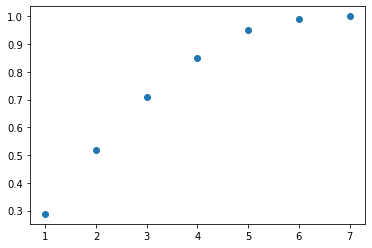

In [83]:
plt.scatter(y = np.cumsum(eigVals),x =list(range(1,8)))

In [99]:
eigVals[:-1] - eigVals[1:]

array([0.05625257, 0.04321718, 0.04518872, 0.04469184, 0.05612786,
       0.03401907])

In [141]:
pca  = PCA(n_components=5,svd_solver="full").fit_transform(x)


In [149]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [154]:
x_train,x_test,y_train,y_test = train_test_split(pca,y,test_size=0.2,random_state=42)

In [155]:
lm = LinearRegression().fit(x_train,y_train)

In [156]:
yhat = lm.predict(x_test)

In [157]:
mean_squared_error(y_test,yhat)

0.6593725349088095

In [158]:
#no pca reduction
0.64218

# pca reduction
0.6593

0.6593

In [168]:
xg = xgb.XGBRegressor(objective="reg:squarederror").fit(X=x_train,y=y_train)

In [169]:
yhat_xgb = xg.predict(x_test)

In [170]:
mean_squared_error(y_test,yhat_xgb)

0.476365800857523

In [179]:
xtr, xt, ytr,yt = train_test_split( x["MedInc"],y,test_size=.2,random_state=42)

In [180]:
xx = xgb.XGBRegressor(objective="reg:squarederror").fit(xtr,ytr)

In [181]:
mean_squared_error(yt,xx.predict(xt))

0.7217920508903085